In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate Affine Functions

In [2]:
def generate_affine_functions(num_functions):
    affine_functions = []
    for _ in range(num_functions):
        a = random.randint(-10, 10)
        b = random.randint(-10, 10)

        affine_functions.append({'slope': a, 'intercept': b})
    return affine_functions

In [3]:
num_functions = 4
affine_functions = generate_affine_functions(num_functions)

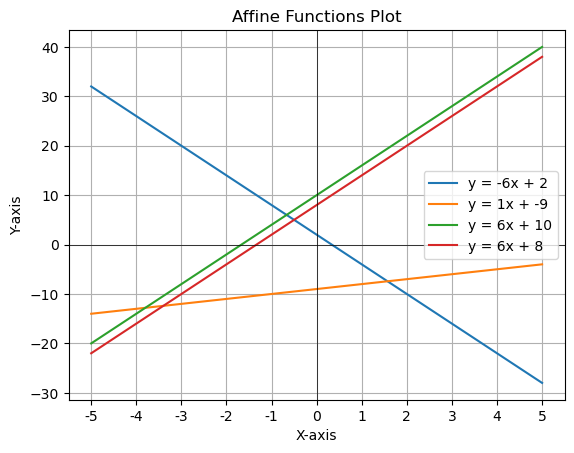

In [9]:
x = np.linspace(-5, 5, 100)

fig, ax = plt.subplots()
x_ticks = np.arange(-10, 10,1)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks)
for func in affine_functions:
    slope = func['slope']
    intercept = func['intercept']
    y = slope * x + intercept
    ax.plot(x, y, label=f'y = {slope}x + {intercept}')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Affine Functions Plot')
ax.legend()


ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.show()

# 2. Sort functions based on slope ascending, intercept descending

In [5]:
affine_functions = sorted(affine_functions, key=lambda x: (x['slope'],-x['intercept']),reverse=False)

# 3. finding min of maximums

In [6]:
def minmax(affine_functions):
    r1 = affine_functions[0]
    L = [r1]

    for r in affine_functions[1:]:
        L.append(r)
        
    S = [(r1,0)]
    L.pop(0)
    
    for r in L:
        if S[-1][0]['slope'] == r['slope']:
            continue
        t = (r['intercept'] - S[-1][0]['intercept']) / (S[-1][0]['slope'] - r['slope'])
        while  t <= S[-1][1]:
            S.pop()
            if len(S) == 0:
                break
            t = (r['intercept'] - S[-1][0]['intercept']) / (S[-1][0]['slope'] - r['slope'])
        S.append((r,t))
        min_value = min(S, key=lambda x: x[1])[1]
    return min_value

In [7]:
minmax(affine_functions)

-0.6666666666666666